<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Faces%20and%20gender%20prediction/Models%20and%20evaluation/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transfer Learning (InceptionV3)

Otra de las maneras para trabajar imágenes con redes neuronales es usando un modelo pre-entrenado y ajustarlo al conjunto de datos que se está modelando. En este caso se usará la arquitectura de una red InceptionV3 y se aplicará transfer learning para la predicción del género de la persona únicamente. En primer lugar debe cargarse dicho modelo para imágenes de la dimensión de nuestro conjunto de datos:

In [1]:
# Carga del modelo InceptionV3
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#inception.summary()

Con el modelo ya cargado, se procede a congelar las capas para realizar transfer learning, así estas no serán entrenables. Así mismo se arman las capas finales de la red que conectarán con las del modelo cargado, incluyendo GlobalAveragePooling, capas densas y de dropout y la salida:

In [ ]:
# Congelar capas para transfer learning
for layer in inception.layers:
    layer.trainable=False
# Capa de pooling para las salidas del modelo preentrenado
pool = tf.keras.layers.GlobalAveragePooling2D()(inception.output)
# Capa densa
dense1 = tf.keras.layers.Dense(1024, activation="relu")(pool)
# Capa de dropout como regularización
drop1 = tf.keras.layers.Dropout(0.5)(dense1)
# Capa densa
dense2 = tf.keras.layers.Dense(512, activation="relu")(drop1)
# Capa de salida
dense3 = tf.keras.layers.Dense(1, activation="sigmoid")(dense2)

model3 = tf.keras.models.Model(inputs=[inception.input], outputs=[dense3])

Al igual que las redes anteriores se compila el modelo ya creado, con la claridad de que la tasa de aprendizaje es bastante menor a la de los modelos ya vistos, ya que esta es la que da mejores resultados:

In [2]:
model3.compile(loss=['binary_crossentropy','mae'], optimizer=tf.optimizers.Adam(lr=1e-6),
                 metrics=["accuracy"])
#model3.summary()

El paso siguiente consiste en entrenar el modelo, únicamente con etiquetas de género para predicción:

In [ ]:
best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="Model3", monitor="val_loss", 
                                                   verbose=True, save_best_only=True,
                                                   save_weights_only=True, mode="min")

hist_m3 = model3.fit(x=x_train, y=y_train_gen, batch_size = 10, validation_split= 0.1, epochs=20, callbacks=[best_callback])

Epoch 1/20
376/378 [============================>.] - ETA: 0s - loss: 0.7595 - accuracy: 0.5423
Epoch 1: val_loss improved from inf to 0.60083, saving model to Model3
378/378 [==============================] - 15s 29ms/step - loss: 0.7596 - accuracy: 0.5426 - val_loss: 0.6008 - val_accuracy: 0.7095
Epoch 2/20
378/378 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.6349
Epoch 2: val_loss improved from 0.60083 to 0.52237, saving model to Model3
378/378 [==============================] - 9s 24ms/step - loss: 0.6598 - accuracy: 0.6349 - val_loss: 0.5224 - val_accuracy: 0.7667
Epoch 3/20
376/378 [============================>.] - ETA: 0s - loss: 0.5964 - accuracy: 0.6902
Epoch 3: val_loss improved from 0.52237 to 0.48100, saving model to Model3
378/378 [==============================] - 8s 22ms/step - loss: 0.5971 - accuracy: 0.6894 - val_loss: 0.4810 - val_accuracy: 0.7786
Epoch 4/20
377/378 [============================>.] - ETA: 0s - loss: 0.5713 - accuracy: 0.704

Los resultados de pérdida y accuracy para esta arquitectura de red neuronal en la predicción del género de las personas son los siguientes:

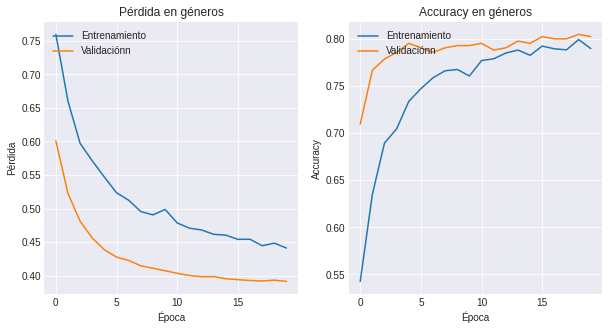

In [ ]:
plt.figure(figsize=(10,5))
# Pérdida
plt.subplot(121)
plt.plot(hist_m3.history['loss'])
plt.plot(hist_m3.history['val_loss'])
plt.title('Pérdida en géneros')
plt.xlabel("Época");
plt.ylabel("Pérdida");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left')
# Accuracy
plt.subplot(122)
plt.plot(hist_m3.history['accuracy'])
plt.plot(hist_m3.history['val_accuracy'])
plt.title('Accuracy en géneros')
plt.xlabel("Época");
plt.ylabel("Accuracy");
plt.legend(['Entrenamiento', 'Validaciónn'], loc='upper left');

Las gráficas presentan un comportamiento suave a comparación de los vistos en los modelos anteriores, con una tasa de predicción bastante alta que se posa sobre el 80% de aciertos.

Para poner a prueba los modelos anteriores y analizar las predicciones en imágenes específicas, se muestran las siguientes celdas, empezando por el modelo de redes convolucionales con regularización:

Original: Género =  Masculino  Edad =  40.0
1/1 [==============================] - 0s 18ms/step
Predicción: Género =  Masculino  Edad =  37


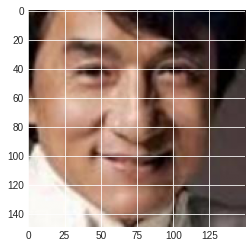

In [ ]:
index=3
# Etiquetas originales
print("Original: Género = ", genero[y_test_gen[index]]," Edad = ", y_test_age[index])

pred = model2.predict(x_test[index].reshape(1, 150, 150, 3))
pred_gender = genero[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])
# Etiquetas predichas por el modelo
print("Predicción: Género = ", pred_gender," Edad = ", pred_age)
plt.imshow(x_test[index])

Original: Género =  Femenino  Edad =  4.0
1/1 [==============================] - 0s 17ms/step
Predicción: Género =  Femenino  Edad =  4


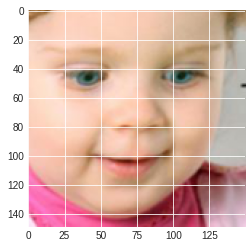

In [ ]:
index=500
# Etiquetas originales
print("Original: Género = ", genero[y_test_gen[index]]," Edad = ", y_test_age[index])

pred = model2.predict(x_test[index].reshape(1, 150, 150, 3))
pred_gender = genero[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])
# Etiquetas predichas por el modelo
print("Predicción: Género = ", pred_gender," Edad = ", pred_age)
plt.imshow(x_test[index])

Donde se observa una correcta predicción de los géneros de las personas y un desacierto en la edad de una de ellas con una diferencia de 3 años entre la edad predicha y la real.

Por otro lado, para la red neuronal producto de transfer learning se tienen los siguientes resultados:

Original: Género =  Masculino
1/1 [==============================] - 0s 24ms/step
Predicción: Género =  Masculino


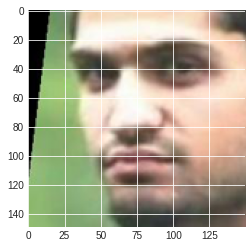

In [ ]:
index=600
# Etiquetas originales
print("Original: Género = ", genero[y_test_gen[index]])

pred = model3.predict(x_test[index].reshape(1, 150, 150, 3))
pred_gender = genero[round(pred[0][0])]
# Etiquetas predichas por el modelo
print("Predicción: Género = ", pred_gender)
plt.imshow(x_test[index])

Original: Género =  Femenino
1/1 [==============================] - 0s 26ms/step
Predicción: Género =  Femenino


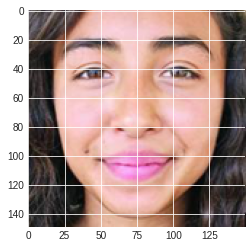

In [ ]:
index=400
# Etiquetas originales
print("Original: Género = ", genero[y_test_gen[index]])

pred = model3.predict(x_test[index].reshape(1, 150, 150, 3))
pred_gender = genero[round(pred[0][0])]
# Etiquetas predichas por el modelo
print("Predicción: Género = ", pred_gender)
plt.imshow(x_test[index])

Mostrando buenos resultados para las imágenes específicas utilizadas.